<a href="https://colab.research.google.com/github/fjme95/algebra-lineal-para-machine-learning/blob/main/2_2_Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt


In [118]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [119]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    if len(images) > n_components:
        images = images[:n_components]
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [144]:
data = fetch_olivetti_faces()

X = data['data']
Y = data['target']

n_samples, n_features = X.shape

In [145]:
print(data['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 50, stratify = Y)
X_train.shape

(320, 4096)

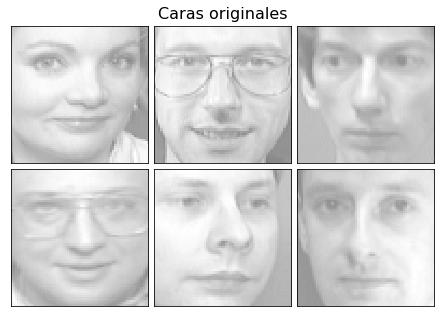

In [149]:
plot_gallery("Caras originales", X_train[:n_components])

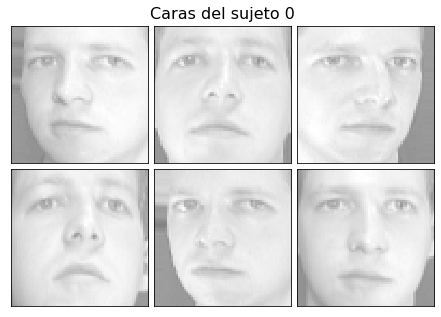

In [150]:
plot_gallery("Caras del sujeto 0", X_train[y_train == 0])

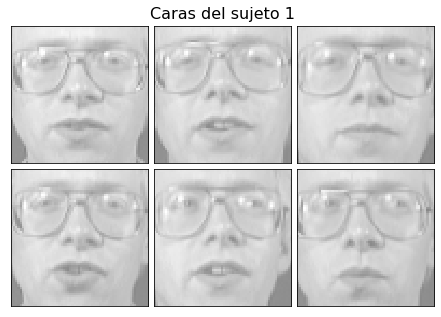

In [151]:
plot_gallery("Caras del sujeto 1", X_train[y_train == 1])

Se puede ver cómo aumenta la variabilidad explicada conforme aumentan los componentes principales para determinar cuántos usaremos

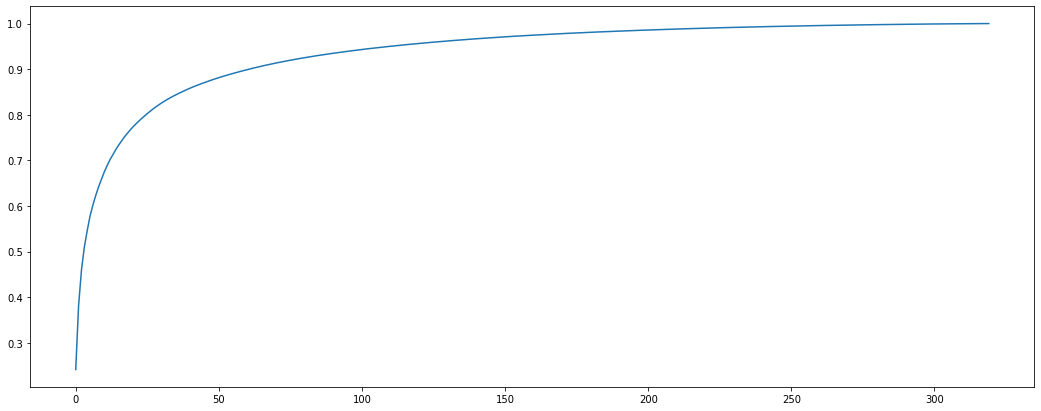

In [152]:
pca = PCA()
eigenfaces = pca.fit(X_train)


plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum())

También podemos especificar el mínimo de variabilidad explicada que queremos

In [153]:
pca = PCA(.95)
eigenfaces = pca.fit_transform(X_train)

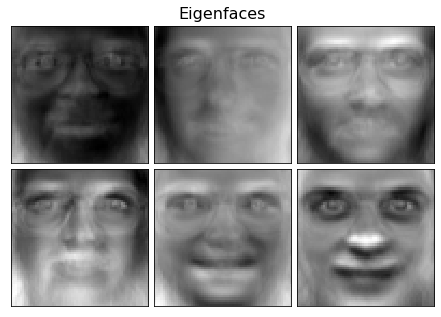

In [154]:
plot_gallery('Eigenfaces', pca.components_[:n_components])

In [155]:
print(eigenfaces.shape)
print(y_train.shape)

(320, 111)
(320,)


In [160]:
svc = GridSearchCV(SVC(), 
                   param_grid = {
                       'C': np.arange(1, 10, .1), 
                       'kernel': ['poly', 'rbf', 'sigmoid'], 
                       'degree': range(3,7)
                   })

# svc = SVC()
svc.fit(eigenfaces, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,...
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'degree': range(3, 7),
                         'kernel': ['pol

In [157]:
X_test_pca = pca.transform(X_test)
predictions = svc.predict(X_test_pca)

In [158]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [147]:
X.shape

(400, 4096)